In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from mpl_toolkits import mplot3d

In [2]:
#esto genera la lineal y devuelve los valores
def generolineal(ndim):
    a = np.empty(ndim+1)
    i = 0
    while i <= ndim:
        a[i] = np.random.uniform(1,2)
        i = i+1
    return a

In [3]:
def f(x,a,ndatos):
    d = np.empty(ndatos)
    i = 0
    while i < ndatos:
        d[i] = a[0]
        d[i] = d[i] + a[1:]@(np.transpose(x[i,:]))
        i = i+1
    return d


In [4]:
def generodatos(ndatos,ndim):
    x = np.random.uniform(low=0, high=1, size=(ndatos,ndim)) #calculo n datos n dimensionales random en un rango
    coef = generolineal(ndim) #genero modelo lineal random
    e = f(x,coef,ndatos)
    i = 0
    n = np.random.normal(0, 0.1, ndatos)
    y = e+n
    return x,y,coef

In [5]:
def generarmatriz(x,ndatos,ndim):
    i = 0
    b = np.empty([ndatos,ndim+1])
    b[:,0] = 1
    while i < ndim:
        b[:,i+1] = np.transpose(x[:,i])
        i = i+1
    return b

In [6]:
def resolvermatriz(A,Y):
    AT = np.transpose(A)
    return (inv(AT@A)@(AT))@(np.transpose(Y))

In [11]:
def error(a,b,ndim):
    i = 0
    res = 0
    while i <= ndim:
        res = res + (a[i]-b[i])**2
        i = i+1
    res = np.sqrt(res)
    return res

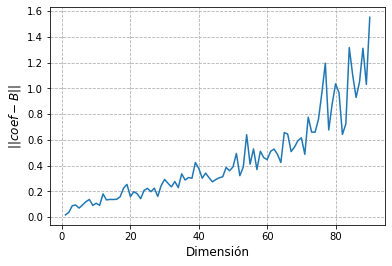

In [49]:
#un primer estudio de la maldicion de la dimensionalidad
#aca vamos a evaluar como crece el error entre los vectores:
# coef (modelo generado)
# B (predecido por la linear regression)
#para varias dimensiones (1 a 10)
def analisis1():
    ndatos = 100
    i = 0
    dimmax = 100
    dimensiones = np.arange(dimmax)
    errores = np.empty(dimmax)
    for i in dimensiones:
        ndim = i + 1
        X,Y,coef = generodatos(ndatos,ndim)
        A = generarmatriz(X,ndatos,ndim)
        B = resolvermatriz(A,Y)
        errores[i] = error(coef,B,ndim)
        
    plt.plot(dimensiones+1,errores)
    plt.grid(b=True,linestyle='--')
    plt.xlabel(r'Dimensión',fontsize=12)
    plt.ylabel('$||coef-B||$',fontsize=12)
    plt.savefig('ej112.pdf')


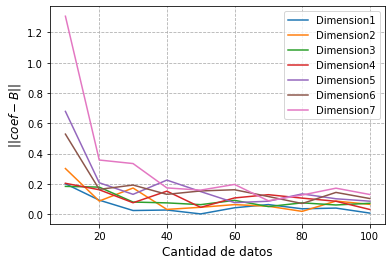

In [51]:
def analisis2(ndim):
    c = 0
    errores = np.empty(10)
    ndatos = np.arange(10,110,10)
    for i in ndatos:
        X,Y,coef = generodatos(i,ndim)
        A = generarmatriz(X,i,ndim)
        B = resolvermatriz(A,Y)
        errores[c] = error(coef,B,ndim)
        c = c+1
    return ndatos,errores

    

In [ ]:
#funcion para graficar algunos hiperplanos para el informe
def graficohiperplanos():
    #primero en una dimension como en el enunciado
    ndatos = 100
    ndim = 1
    X,Y,coef = generodatos(ndatos,ndim)
    A = generarmatriz(X,ndatos,ndim)
    B = resolvermatriz(A,Y)
    plt.figure(1)
    plt.scatter(X,Y,label='Datos')
    plt.xlabel('x')
    plt.ylabel('y')
    XA = np.linspace(0,1,1000)
    YA = B[0] + B[1]*XA
    plt.plot(XA,YA,c='r',linewidth=3,label='Ajuste')
    plt.legend()
    plt.savefig('ej13.pdf')
    #ahora en 2 dimensiones que lo podemos visualizar tambien
    #aparte pruebo graf 3d en matplotlib
    ndatos = 100
    ndim = 2
    X,Y,coef = generodatos(ndatos,ndim)
    A = generarmatriz(X,ndatos,ndim)
    B = resolvermatriz(A,Y)
    fig = plt.figure(2)
    ax = plt.axes(projection='3d')
    ax.set_xlabel('x',fontsize=12)
    ax.set_ylabel('y',fontsize=12)
    ax.set_zlabel('z',fontsize=12)
    XA,YA = np.meshgrid(XA,XA)
    ax.scatter3D(X[:,0], X[:,1], Y, c='red',s=50,label='Datos')
    ZA = B[0] + B[1]*XA + B[2]*YA
    ax.plot_surface(XA, YA, ZA,alpha = 1)
    plt.legend()
    ax.view_init(30,70)
    plt.savefig('ej15.pdf')
    

In [ ]:
#primer analisis del error 
analisis1()
#segundo analisis del error
i=1
plt.figure()
plt.grid(b=True,linestyle='--')
plt.xlabel(r'Cantidad de datos',fontsize=12)
plt.ylabel(r'$||coef-B||$',fontsize=12)
while i <= 7: 
    ndatos,errores = analisis2(i)
    plt.plot(ndatos,errores, label='Dimension'+str(i))
    i = i+1
plt.legend()
plt.savefig('ej12.pdf')
#grafico de los hiperplanos para el informe
graficohiperplanos()